#### Import required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#### Load the images

In [30]:
# import the data
data = pd.read_csv('dataset_here/class_dict_seg.csv')

# Specify the directory containing the dataset
dataset_dir = "dataset_here/dataset/semantic_drone_dataset/"
dataset_dir_label_images_semantic = "dataset_here/dataset/semantic_drone_dataset/label_images_semantic/"
dataset_dir_original_images = "dataset_here/dataset/semantic_drone_dataset/original_images/"

# Create lists to store image paths and labels
image_paths = []
labels = []

# Loop through each image in the dataset and append its path and label to the lists
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        label = class_name
        image_paths.append(image_path)
        labels.append(label)

#### Split the data into train and test sets

In [31]:
# Split the dataset into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=test_ratio, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), stratify=y_train, random_state=42)


#### Pre processing of data

In [32]:
# Define a function to pre-process an image
def preprocess_image(image_path, image_size):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the specified size
    image = cv2.resize(image, image_size)

    # Normalize the image by dividing each pixel value by 255
    image = image.astype(np.float32) / 255.0

    return image

# Define the image size to resize the images to
image_size = (256, 256)

# Preprocess the training images
X_train_processed = []
for image_path in X_train:
    image = preprocess_image(image_path, image_size)
    X_train_processed.append(image)
X_train_processed = np.array(X_train_processed)

# Preprocess the validation images
X_val_processed = []
for image_path in X_val:
    image = preprocess_image(image_path, image_size)
    X_val_processed.append(image)
X_val_processed = np.array(X_val_processed)

# Preprocess the test images
X_test_processed = []
for image_path in X_test:
    image = preprocess_image(image_path, image_size)
    X_test_processed.append(image)
X_test_processed = np.array(X_test_processed)



#### Convert the labels to numerical encodings and save the preprocessed data to a file

In [33]:
# Convert the labels to numerical encoding
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
y_train_encoded = np.array([label_mapping[label] for label in y_train])

# Convert the labels to numerical encoding
y_val_encoded = np.array([label_mapping[label] for label in y_val])

# Convert the labels to numerical encoding
y_test_encoded = np.array([label_mapping[label] for label in y_test])


# save the pro process data using np.save 
np.save('X_train_processed.npy', X_train_processed)
np.save('X_val_processed.npy', X_val_processed)
np.save('X_test_processed.npy', X_test_processed)

# save the labels using np.save
np.save('y_train_encoded.npy', y_train_encoded)
np.save('y_val_encoded.npy', y_val_encoded)
np.save('y_test_encoded.npy', y_test_encoded)

# save the label mapping using np.save
np.save('label_mapping.npy', label_mapping)

#### Visualize some of the images  in the training set , validation set and test set

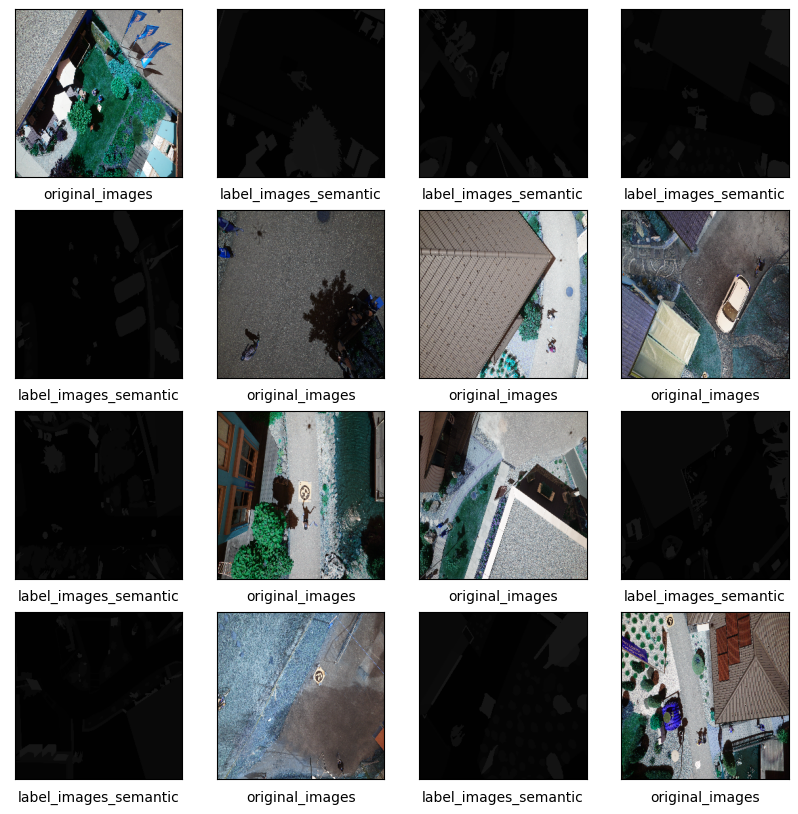

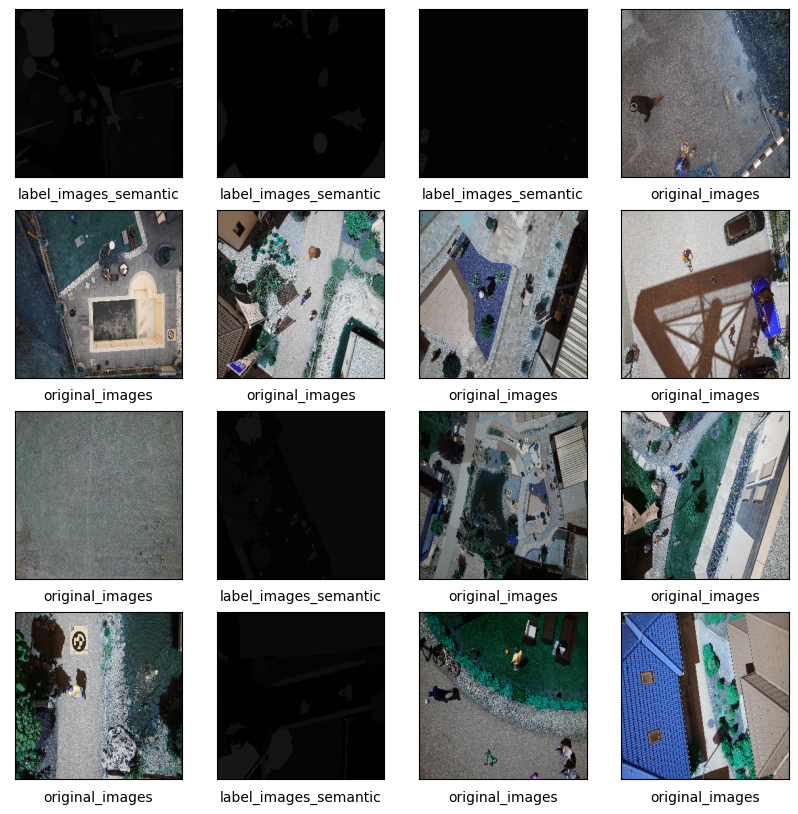

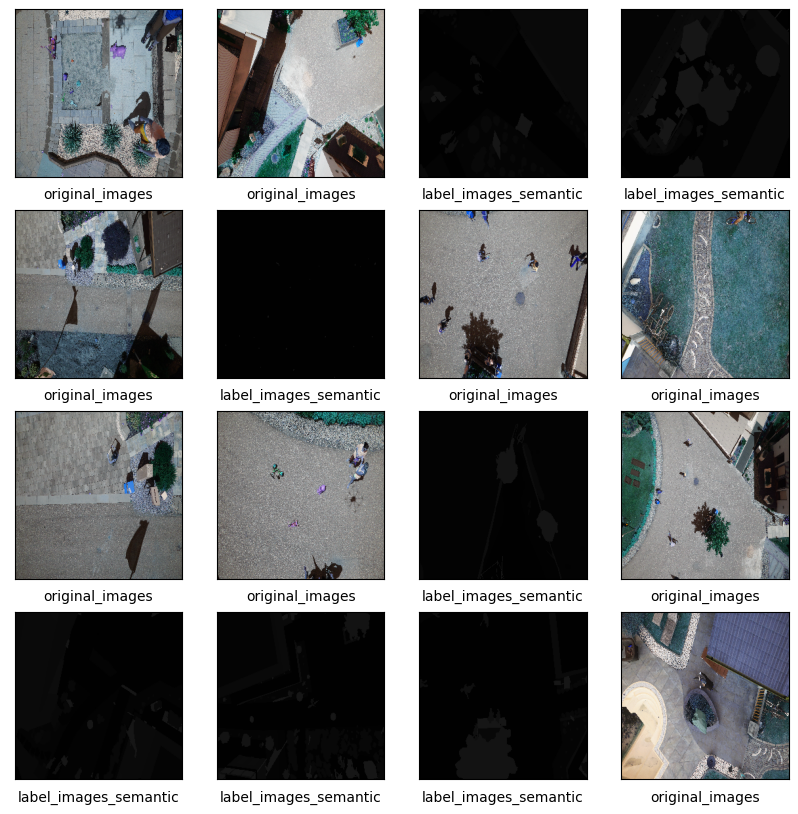

In [34]:
#visualize some of the images  in the training set , validation set and test set
# Define a function to plot a grid of photos
def show_grid(image_batch, label_batch, batch_size):
    cols = 4
    rows = batch_size // cols
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_batch[i])
        plt.xlabel(label_batch[i])
    plt.show()

# Plot a grid of photos from the training dataset - add axis labels
show_grid(X_train_processed, y_train, 16)

# Plot a grid of photos from the validation dataset
show_grid(X_val_processed, y_val, 16)

# Plot a grid of photos from the test dataset
show_grid(X_test_processed, y_test, 16)